In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyodbc
import pymssql as sql
import warnings
warnings.filterwarnings("ignore")

In [84]:
df =  pd.read_csv('DataSets/players_20.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [85]:
#Removendo colunas desnecessárias 
df = df.iloc[:,:17]
df = df.drop(['player_url', 'dob'], axis=1)
df.head()

,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5
3,200389,J. Oblak,Jan Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3
4,183277,E. Hazard,Eden Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4


In [86]:
lista = list(df.columns)
lista

['sofifa_id',
 'short_name',
 'long_name',
 'age',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation']

In [87]:
#Alterando o posicionamento da coluna Overall e Potential
if 'overall' in lista and 'overall' != lista[4]:
    colOverall = df['overall']
    del df['overall']
    lista.insert(4,'overall')
    df.insert(4, 'overall', colOverall)
elif lista[4] == 'overall':
    print('A coluna "overall" já está na posição correta.')
else:
    print('A coluna "overall" não está presente no DataFrame.')


In [88]:
if 'potential'in lista and 'potential' != lista[5]:
    colPot = df['potential']
    del df['potential']
    df.insert(5, 'potential', colPot)
    lista.insert(5, 'potential')
elif lista[5] == 'potential':
    print('A coluna "overall" já está na posição correta.')
else:
    print('A coluna "overall" não está presente no DataFrame.')

In [89]:
#Ordenando por potencial
potential = df[df['age'] < 25]
potential = potential.sort_values(by='potential',ascending=False)


potential.head(20)

,sofifa_id,short_name,long_name,age,overall,potential,height_cm,weight_kg,nationality,club,value_eur,wage_eur,player_positions,preferred_foot,international_reputation
10,231747,K. Mbappé,Kylian Mbappé,20,89,95,178,73,France,Paris Saint-Germain,93500000,155000,"ST, RW",Right,3
411,242444,João Félix,João Félix Sequeira,19,80,93,181,70,Portugal,Atlético Madrid,28000000,38000,"CF, ST",Right,1
73,235243,M. de Ligt,Matthijs de Ligt,19,85,93,189,89,Netherlands,Juventus,50000000,76000,CB,Right,3
55,222492,L. Sané,Leroy Sané,23,86,92,183,75,Germany,Manchester City,61000000,195000,LW,Left,2
568,238794,Vinícius Jr.,Vinícius José de Oliveira Júnior,18,79,92,176,73,Brazil,Real Madrid,22500000,60000,LW,Right,2
74,230621,G. Donnarumma,Gianluigi Donnarumma,20,85,92,196,90,Italy,Milan,41500000,34000,GK,Right,3
109,235790,K. Havertz,Kai Havertz,20,84,92,188,83,Germany,Bayer 04 Leverkusen,46000000,70000,"CAM, RM",Left,1
108,233049,J. Sancho,Jadon Sancho,19,84,92,180,76,England,Borussia Dortmund,44500000,61000,"RM, LM",Right,2
75,228702,F. de Jong,Frenkie de Jong,22,85,91,180,74,Netherlands,FC Barcelona,52000000,195000,"CM, CDM",Right,3
1254,237692,P. Foden,Philip Foden,19,76,90,171,69,England,Manchester City,16500000,52000,"CAM, CM",Left,1


In [90]:
brasil = df[df['nationality'] == 'Brazil']
brasilTop = brasil.head(10)
brasilTop

,sofifa_id,short_name,long_name,age,overall,potential,height_cm,weight_kg,nationality,club,value_eur,wage_eur,player_positions,preferred_foot,international_reputation
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,92,92,175,68,Brazil,Paris Saint-Germain,105500000,290000,"LW, CAM",Right,5
13,212831,Alisson,Alisson Ramses Becker,26,89,91,191,91,Brazil,Liverpool,58000000,155000,GK,Right,3
25,210257,Ederson,Ederson Santana de Moraes,25,88,91,188,86,Brazil,Manchester City,54500000,185000,GK,Left,2
42,200145,Casemiro,Carlos Henrique Venancio Casimiro,27,87,89,185,84,Brazil,Real Madrid,53500000,240000,CDM,Right,3
44,135507,Fernandinho,Fernando Luiz Rosa,34,87,87,179,67,Brazil,Manchester City,19500000,200000,CDM,Right,3
45,164240,Thiago Silva,Thiago Emiliano da Silva,34,87,87,183,82,Brazil,Paris Saint-Germain,18500000,135000,CB,Right,4
56,207865,Marquinhos,Marcos Aoás Corrêa,25,86,90,183,75,Brazil,Paris Saint-Germain,51500000,120000,"CB, CDM",Right,3
63,201942,Roberto Firmino,Roberto Firmino Barbosa de Oliveira,27,86,87,181,76,Brazil,Liverpool,52000000,170000,"CF, ST, CAM",Right,3
68,189242,Coutinho,Philippe Coutinho Correia,27,86,86,172,68,Brazil,FC Bayern München,46500000,175000,"LW, CM",Right,3
81,209499,Fabinho,Fábio Henrique Tavares,25,85,89,188,78,Brazil,Liverpool,45000000,125000,CDM,Right,3


In [91]:
brasil = df[df['nationality'] == 'Brazil']
brasilTop = brasil.head(10)
brasilTop

,sofifa_id,short_name,long_name,age,overall,potential,height_cm,weight_kg,nationality,club,value_eur,wage_eur,player_positions,preferred_foot,international_reputation
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,92,92,175,68,Brazil,Paris Saint-Germain,105500000,290000,"LW, CAM",Right,5
13,212831,Alisson,Alisson Ramses Becker,26,89,91,191,91,Brazil,Liverpool,58000000,155000,GK,Right,3
25,210257,Ederson,Ederson Santana de Moraes,25,88,91,188,86,Brazil,Manchester City,54500000,185000,GK,Left,2
42,200145,Casemiro,Carlos Henrique Venancio Casimiro,27,87,89,185,84,Brazil,Real Madrid,53500000,240000,CDM,Right,3
44,135507,Fernandinho,Fernando Luiz Rosa,34,87,87,179,67,Brazil,Manchester City,19500000,200000,CDM,Right,3
45,164240,Thiago Silva,Thiago Emiliano da Silva,34,87,87,183,82,Brazil,Paris Saint-Germain,18500000,135000,CB,Right,4
56,207865,Marquinhos,Marcos Aoás Corrêa,25,86,90,183,75,Brazil,Paris Saint-Germain,51500000,120000,"CB, CDM",Right,3
63,201942,Roberto Firmino,Roberto Firmino Barbosa de Oliveira,27,86,87,181,76,Brazil,Liverpool,52000000,170000,"CF, ST, CAM",Right,3
68,189242,Coutinho,Philippe Coutinho Correia,27,86,86,172,68,Brazil,FC Bayern München,46500000,175000,"LW, CM",Right,3
81,209499,Fabinho,Fábio Henrique Tavares,25,85,89,188,78,Brazil,Liverpool,45000000,125000,CDM,Right,3


In [92]:
brOld = brasil[brasil['age']>25]
brOld = brOld.head(15)

brYoung = brasil[brasil['age'] <=25]
brYoung = brYoung.sort_values(by='potential', ascending=False).head(15)

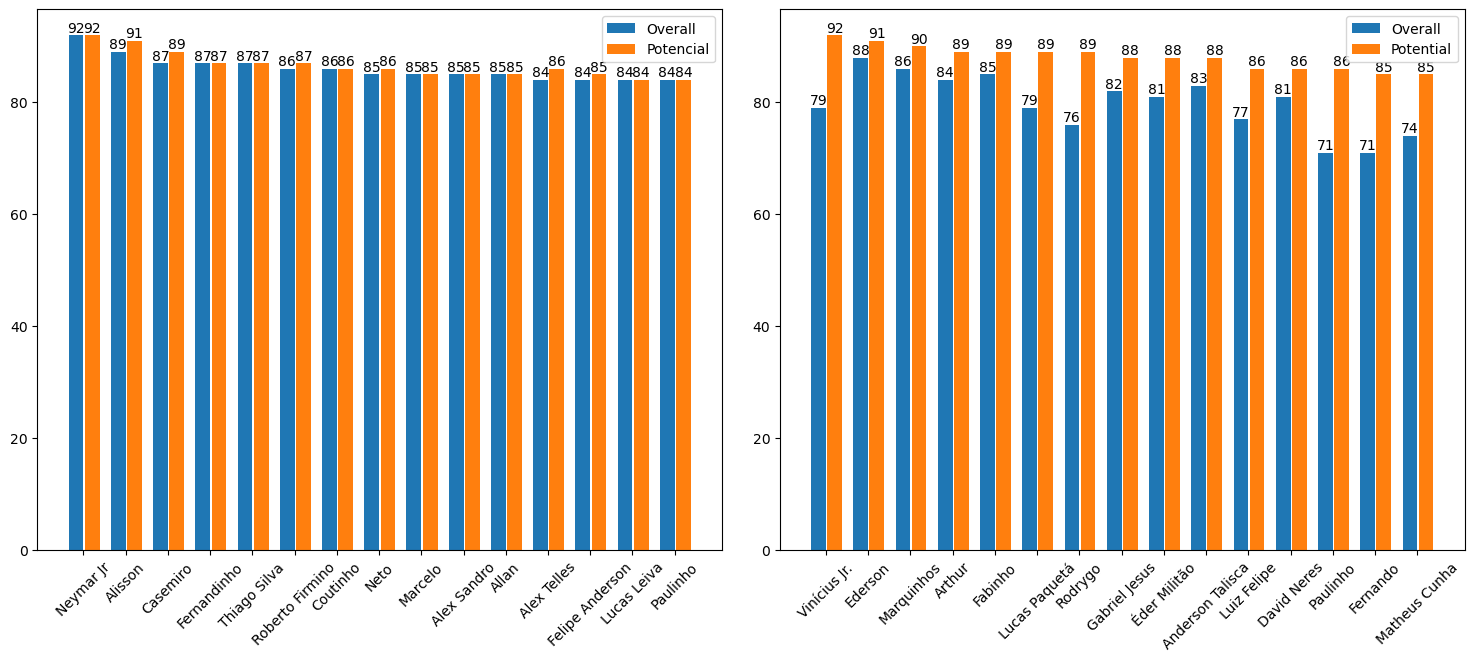

In [93]:
#Comparação entre os principais jogadores dos Brasil x Promissores

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 6, forward=True)
lenOld = np.arange(len(brOld['short_name']))
size = 0.35
plt.tight_layout()
#x = braOld['short_name']
x1 = lenOld - size /2
x2 = lenOld + (size + 0.07) / 2
oldOver = ax[0].bar(x1, brOld['overall'],width=size, label= "Overall")
oldPot = ax[0].bar(x2, brOld['potential'],width=size, label= 'Potencial')
ax[0].set_xticks(lenOld)
ax[0].set_xticklabels(brOld['short_name'])
ax[0].tick_params(axis='x', rotation=45)
ax[0].legend()
for i, v in enumerate(brOld['overall']):
    ax[0].text(x1[i], v + 0.02, str(v), ha='center', va='bottom')
    
for i, v in enumerate(brOld['potential']):
    ax[0].text(x2[i], v + 0.02, str(v), ha='center', va='bottom')
    
    
    
lenYoung = np.arange(len(brOld['short_name']))
size = 0.35
x1= lenYoung - size/2
x2= lenYoung + (size +0.06)/2
youngOver = ax[1].bar(x1, brYoung['overall'], width=size, label= 'Overall')
youngPot = ax[1].bar(x2, brYoung['potential'], width=size, label= 'Potential')
ax[1].set_xticks(lenYoung)
ax[1].set_xticklabels(brYoung['short_name'])
ax[1].tick_params(axis='x', rotation=45)
ax[1].legend()

for i, v in enumerate(brYoung['overall']):
    ax[1].text(x1[i], v + 0.02, str(v), ha='center', va='bottom')
    
for i, v in enumerate(brYoung['potential']):
    ax[1].text(x2[i], v + 0.02, str(v), ha='center', va='bottom')


Text(0.5, 1.0, 'Principais Nacionalidades')

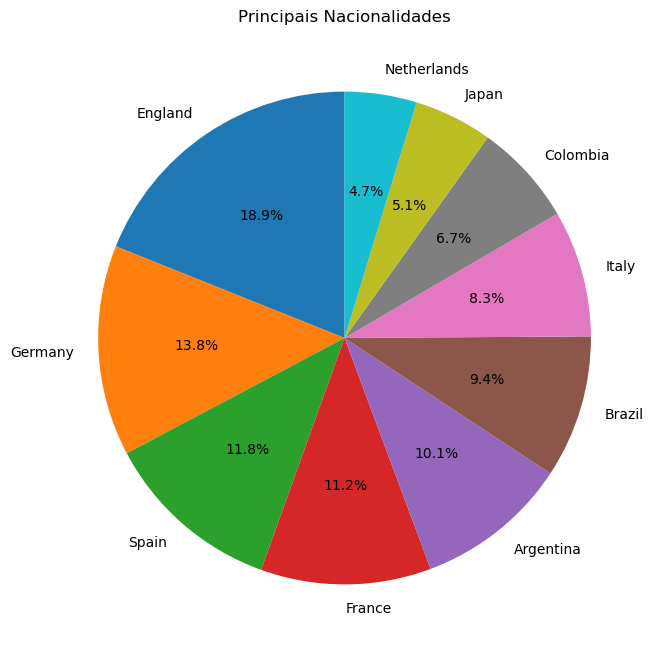

In [94]:
plt.figure(figsize=(8, 8))
nation_counts = df['nationality'].value_counts().head(10)
size = nation_counts.values
labels =  nation_counts.index
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Principais Nacionalidades')

In [95]:
df.head()

,sofifa_id,short_name,long_name,age,overall,potential,height_cm,weight_kg,nationality,club,value_eur,wage_eur,player_positions,preferred_foot,international_reputation
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,94,94,170,72,Argentina,FC Barcelona,95500000,565000,"RW, CF, ST",Left,5
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,93,93,187,83,Portugal,Juventus,58500000,405000,"ST, LW",Right,5
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,92,92,175,68,Brazil,Paris Saint-Germain,105500000,290000,"LW, CAM",Right,5
3,200389,J. Oblak,Jan Oblak,26,91,93,188,87,Slovenia,Atlético Madrid,77500000,125000,GK,Right,3
4,183277,E. Hazard,Eden Hazard,28,91,91,175,74,Belgium,Real Madrid,90000000,470000,"LW, CF",Right,4


In [107]:
connect = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-1VPOTLF\SQLEXPRESS;DATABASE=FIFA;Trusted_Connection=yes;')
print('BANCO CONECTADO')

BANCO CONECTADO


In [108]:
cursor = connect.cursor()

InsertQuery = "INSERT INTO PLAYERS (ID_PLAYERS, SHORT_NAME, LONG_NAME, AGE, OVERALL, POTENTIAL, HEIGHT_CM, WEIGHT_KG, NATIONALITY, CLUB, VALUE_EUR, WAGE_EUR, POSITIONS, PREFERRED_FOOT, INTERNAT_REPUTION) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

for index, row in df.iterrows():
    DataTuple = (
        row['sofifa_id'], row['short_name'], row['long_name'], row['age'], row['overall'], row['potential'], row['height_cm'],
        row['weight_kg'], row['nationality'], row['club'], row['value_eur'], row['wage_eur'], row['player_positions'], row['preferred_foot'],
        row['international_reputation']
    )
    cursor.execute(InsertQuery, DataTuple)
    
    connect.commit()

In [105]:
cursor.close()
connect.close()